In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_image(image,cmap_type = 'gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.axis('off')
    plt.grid(visible = True)
    plt.show()

In [3]:
def compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0

    return weight0 * var0 + weight1 * var1

In [4]:
def best_threshold(im):
    # testing all thresholds from 0 to the maximum of the image
    threshold_range = range(np.int_(np.max(im))+1)
    criterias = [compute_otsu_criteria(im, th) for th in threshold_range]

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmin(criterias)]
    return best_threshold

In [5]:
def threshold_binary(im, th):
    im = np.where(im > th, 1, 0)
    return im

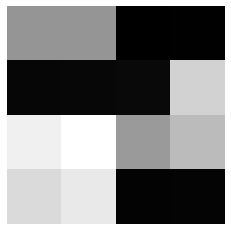

In [6]:
im = np.array([[120,120,21,22],[25,26,27,160],[180,190,123,145],[165,175,23,24]])
show_image(im)

In [7]:
best_threshold(im)

28

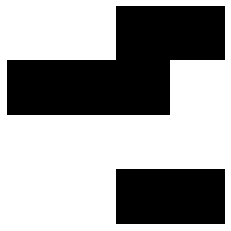

In [8]:
show_image(threshold_binary(im, best_threshold(im)))

In [9]:
from skimage import data
from skimage import color

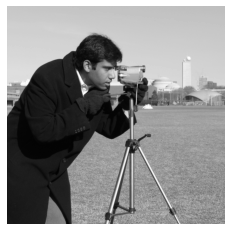

In [10]:
cam = data.camera()
show_image(cam)

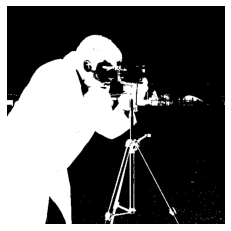

In [11]:
show_image(threshold_binary(cam * 255, best_threshold(cam * 255)))

In [ ]:
# https://muthu.co/otsus-method-for-image-thresholding-explained-and-implemented/
# https://en.wikipedia.org/wiki/Otsu%27s_method
# https://sci-hub.se/10.1109/TSMC.1979.4310076